# networkx

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [10]:
# !pip3 install networkx matplotlib

In [2]:
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from abcli.logger import logger

logger.info(f"{fullname()}, built on {string.pretty_date()}")

botocore.credentials Found credentials in environment variables.
:: abcli-8.119.1, built on 27 April 2024, 14:57:05


---

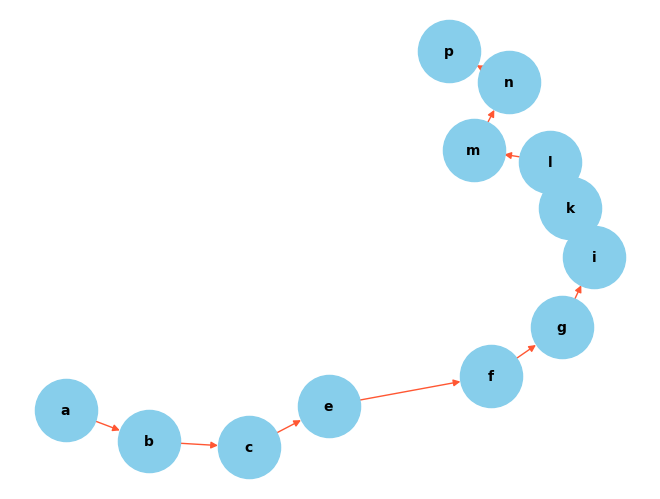

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def parse_notation(notation, graph, parent=None):
    stack = []
    i = 0
    while i < len(notation):
        char = notation[i]
        
        if char == '{':
            subseq = ''
            i += 1
            balance = 1
            while balance != 0:
                if notation[i] == '{':
                    balance += 1
                elif notation[i] == '}':
                    balance -= 1
                if balance != 0:
                    subseq += notation[i]
                i += 1
            nodes = parse_notation(subseq, graph)
            if parent:
                for node in nodes:
                    graph.add_edge(parent, node)
            stack.extend(nodes)
        elif char == '[':
            subseq = ''
            i += 1
            balance = 1
            while balance != 0:
                if notation[i] == '[':
                    balance += 1
                elif notation[i] == ']':
                    balance -= 1
                if balance != 0:
                    subseq += notation[i]
                i += 1
            last_node = parse_notation(subseq, graph, parent)
            if parent:
                graph.add_edge(parent, last_node[0])
            stack.extend(last_node)
        else:
            if parent:
                graph.add_edge(parent, char)
            stack.append(char)
        i += 1
    
    # Connecting sequential tasks
    for j in range(len(stack) - 1):
        graph.add_edge(stack[j], stack[j + 1])

    return stack

def create_dag(notation):
    graph = nx.DiGraph()
    parse_notation(notation, graph)
    return graph

def draw_dag(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='#FF5733', font_size=10, font_weight='bold')
    plt.show()

# Example usage
notation = "{[a{bc}d{efg}hi]j[kl{mn}op]q}"
dag = create_dag(notation)
draw_dag(dag)


---

In [8]:
# END